# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

sns.set(style="whitegrid")

# Load and Inspect The Dataset

In [2]:
df = pd.read_csv("Iris.csv")
print(df.head())

   Id  Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
df.tail()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.describe()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal Length  150 non-null    float64
 2   Sepal Width   150 non-null    float64
 3   Petal Length  150 non-null    float64
 4   Petal Width   150 non-null    float64
 5   Species       150 non-null    str    
dtypes: float64(4), int64(1), str(1)
memory usage: 7.2 KB


# Data Preprocessing

In [6]:
df.drop("Id", axis=1, inplace=True)
print(df.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# EDA-Exploratory Data Analysis

1. Species Distribution

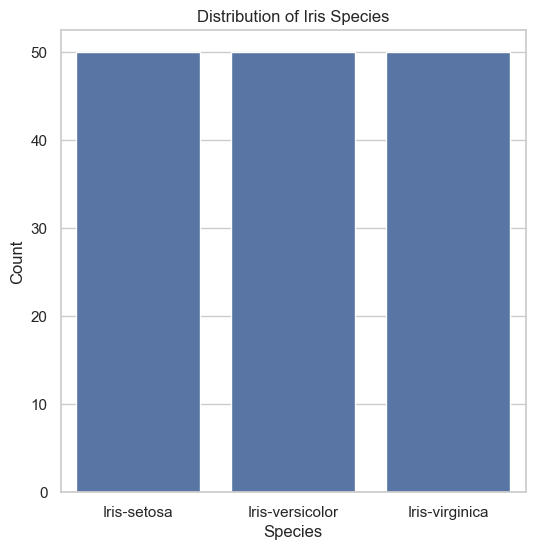

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x="Species", data=df)
plt.title("Distribution of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

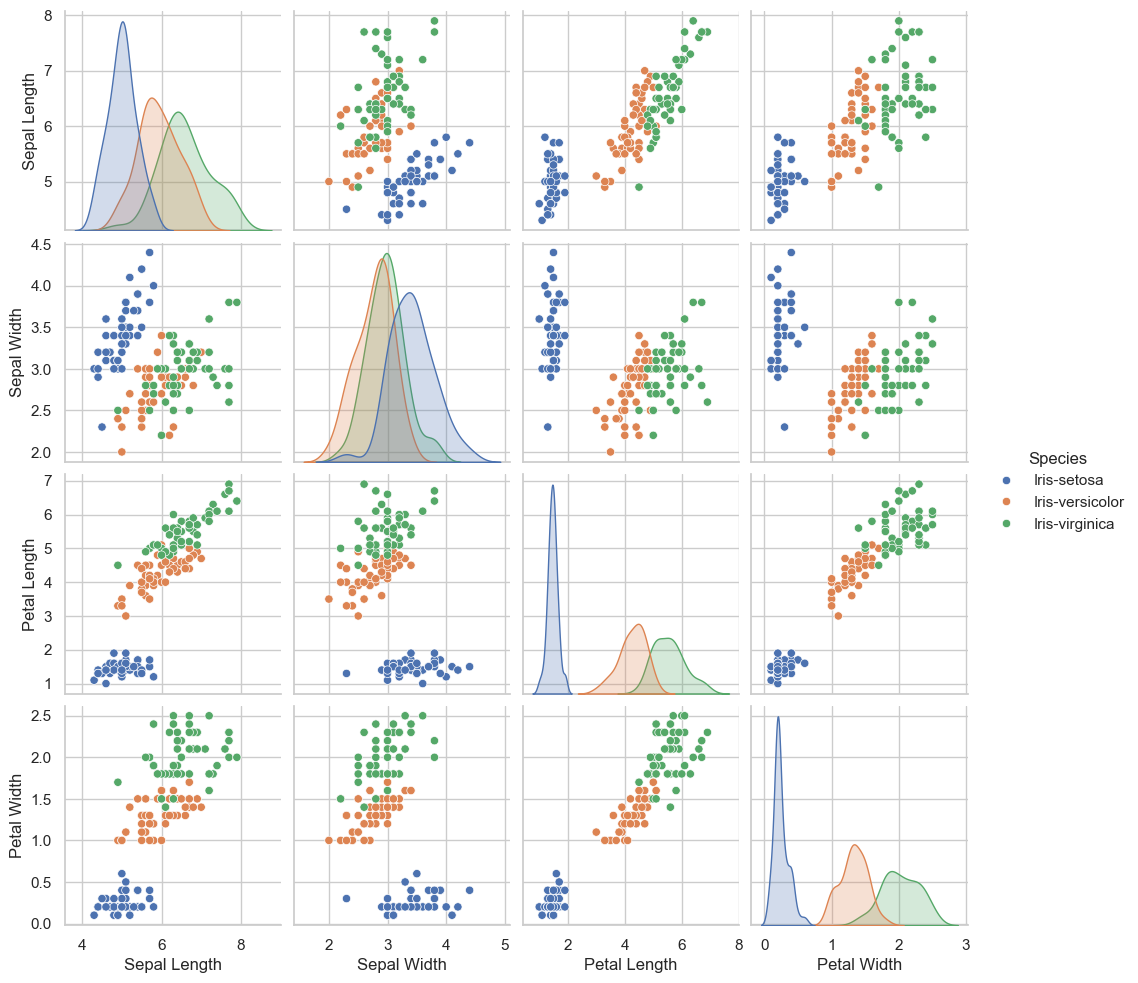

In [8]:
sns.pairplot(df, hue="Species")
plt.show()

2. Petal Length vs Petal Width

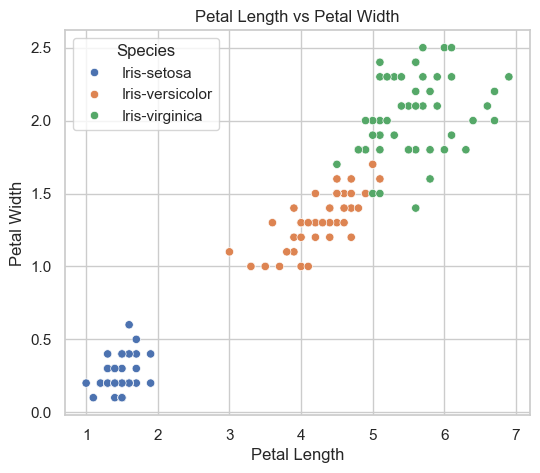

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="Petal Length",
    y="Petal Width",
    hue="Species",
    data=df
)
plt.title("Petal Length vs Petal Width")
plt.show()

3. Sepal Length vs Sepal Width

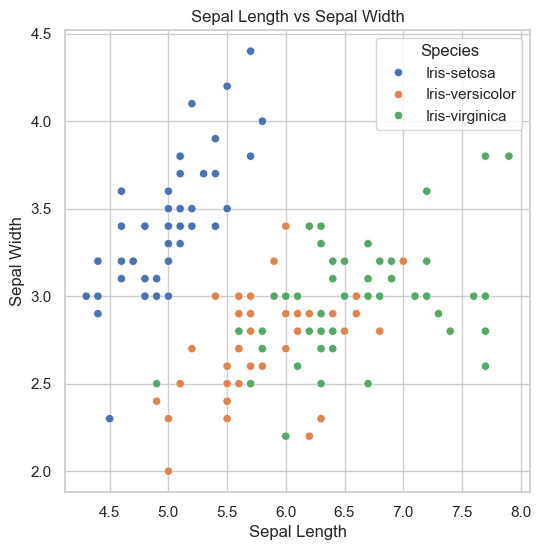

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="Sepal Length",
    y="Sepal Width",
    hue="Species",
    data=df
)
plt.title("Sepal Length vs Sepal Width")
plt.show()


4. Correlation Heatmap

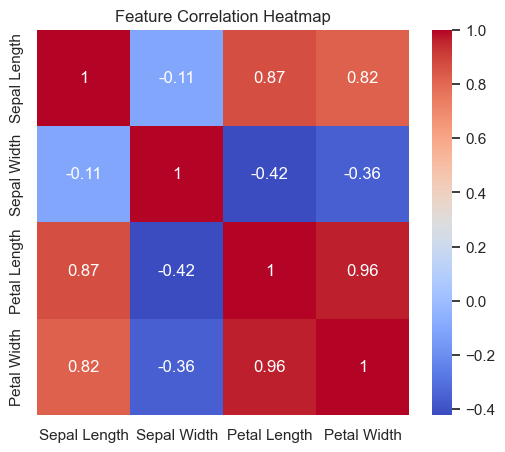

In [11]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Label Encoding

In [13]:
data=df.values
X=data[:,0:4]
Y=data[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Model Training

MODEL 1: Support Vector Machine Algorithm

In [15]:
model_svm=SVC()
model_svm.fit(X_train,Y_train)
prediction1=model_svm.predict(X_test)
print("Support Vector Machine Algorithm Accuracy:",accuracy_score(Y_test,prediction1)*100)

Support Vector Machine Algorithm Accuracy: 100.0


MODEL 2: Logistic Regression

In [16]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
prediction2 = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, prediction2)*100)

Logistic Regression Accuracy: 100.0


MODEL 3: K-Nearest Neighbours(KNN)

In [17]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
prediction3=knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(Y_test, prediction3)*100)

KNN Accuracy: 96.66666666666667


MODEL 4: Decision Tree

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
prediction4 = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(Y_test, prediction4)*100)

Decision Tree Accuracy: 96.66666666666667


# Model Comparison

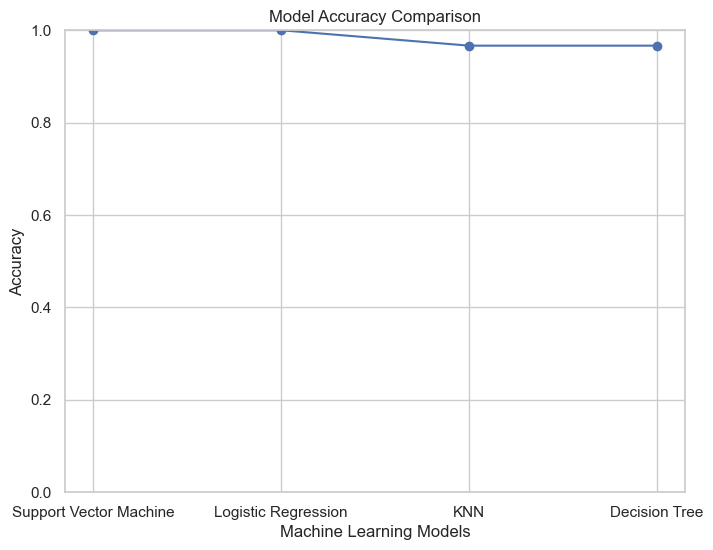

In [26]:
models = ["Support Vector Machine","Logistic Regression","KNN","Decision Tree"]
accuracy = [
    accuracy_score(Y_test, prediction1),
    accuracy_score(Y_test, prediction2),
    accuracy_score(Y_test, prediction3),
    accuracy_score(Y_test, prediction4)
]

plt.figure(figsize=(8,6))
plt.plot(models, accuracy, marker='o')
plt.title("Model Accuracy Comparison")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# Confusion Matrix & Classification Report

In [21]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, prediction3))
print("\nClassification Report:")
print(classification_report(Y_test, prediction3))

Confusion Matrix:
[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Predictions on New Samples

In [23]:
X_new=np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
prediction=knn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
